In [1]:
# 🌤️ Step 1: Import the essentials
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 📥 Step 2: Load the weather data
df = pd.read_csv("dataset/Summary of Weather.csv")

# 🧹 Step 3: Clean the data
# Drop mostly-null columns
df = df.dropna(axis=1, thresh=len(df) * 0.1)

# Convert string numbers to floats (if needed)
for col in ['Precip', 'Snowfall', 'PRCP', 'SNF']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing target or features
df = df.dropna(subset=['MeanTemp', 'MaxTemp', 'MinTemp'])
df = df.dropna()

# ✨ Step 4: Select features and target
features = ['Precip', 'MaxTemp', 'MinTemp', 'Snowfall', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF']
X = df[features]
y = df['MeanTemp']

# 🎯 Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Step 6: Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 📊 Step 7: Make predictions
y_pred = model.predict(X_test)

# 🧮 Step 8: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"🔥 RMSE: {rmse:.4f}")
print(f"🎯 R² Score: {r2:.4f}")

# 📈 Optional: Peek at model coefficients
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coeff_df)


/tmp/ipykernel_4694/2820967775.py:9: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset/Summary of Weather.csv")


🔥 RMSE: 0.0000
🎯 R² Score: 1.0000
    Feature   Coefficient
0    Precip -2.584202e-12
1   MaxTemp -5.134945e-02
2   MinTemp -1.127189e-02
3  Snowfall  2.944218e-11
4      PRCP -1.099084e-11
5       MAX  2.852747e-02
6       MIN  6.262159e-03
7       MEA  5.555556e-01
8       SNF  4.072289e-12


/tmp/ipykernel_4694/448330125.py:12: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


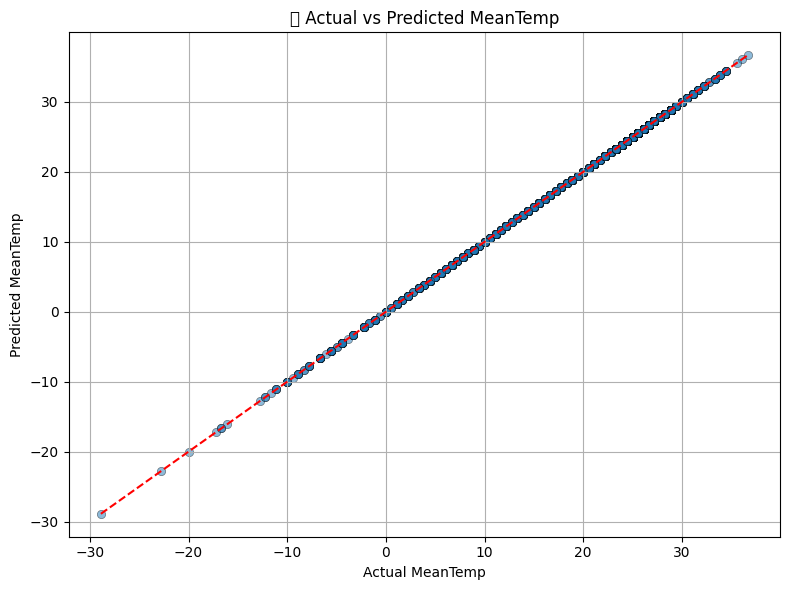

/tmp/ipykernel_4694/448330125.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


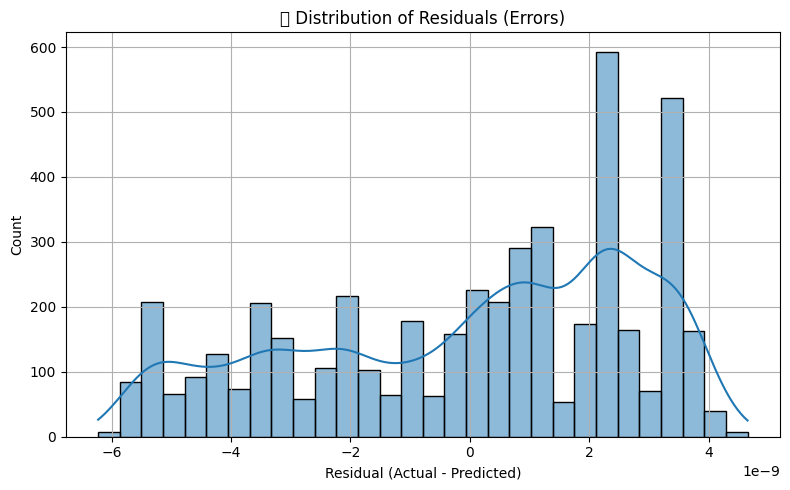

/tmp/ipykernel_4694/448330125.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df_sorted, x="Coefficient", y="Feature", palette="viridis")
/tmp/ipykernel_4694/448330125.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


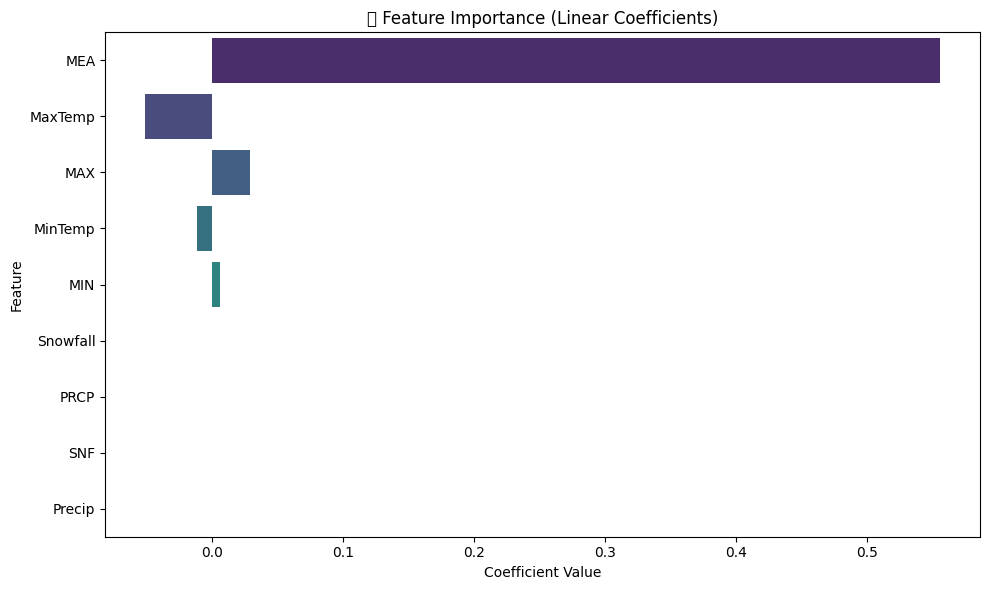

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🟢 1. Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, edgecolor='k')
plt.xlabel("Actual MeanTemp")
plt.ylabel("Predicted MeanTemp")
plt.title("📌 Actual vs Predicted MeanTemp")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔵 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("🔍 Distribution of Residuals (Errors)")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🟣 3. Coefficient Plot
coeff_df_sorted = coeff_df.sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coeff_df_sorted, x="Coefficient", y="Feature", palette="viridis")
plt.title("📊 Feature Importance (Linear Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
